In [1]:
import torch.nn as nn
import gym
from seagul.nn import Categorical_MLP, MLP, DummyNet, fit_model
from seagul.rl.ppo_switching import ppo_switch
import torch
from tqdm import trange
from numpy import pi
import numpy as np

import matplotlib.pyplot as plt

torch.set_default_dtype(torch.double)

policy = MLP(input_size=4, output_size=1, layer_size=12, num_layers=2, activation=nn.ReLU)
value_fn = MLP(input_size=4, output_size=1, layer_size=12, num_layers=2, activation=nn.ReLU)
gate_fn = Categorical_MLP(input_size=4, output_size=1, layer_size=12, num_layers=2, activation=nn.ReLU)

In [2]:
# Generate data for the supervised learning task
env = gym.make('su_cartpole-v0')
num_points = int(2e4)

X = torch.zeros(num_points, env.observation_space.shape[0])  
Y = torch.zeros(num_points,1)

for i in trange(num_points):
        
        point = env.observation_space.sample()
        X[i] = torch.as_tensor(point)
        
        if (point[0] > 145 * pi / 180) and (point[0] < 215 * pi / 180):
            Y[i] = 1
        else:
            Y[i] = 0
            

100%|██████████| 20000/20000 [00:02<00:00, 8597.35it/s]


100%|██████████| 30/30 [00:43<00:00,  1.51s/it]


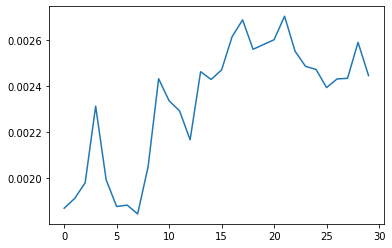

In [9]:
hist = fit_model(gate_fn,X,Y,30)
plt.plot(hist)

In [10]:
# Generate data for the supervised learning task
env = gym.make('su_cartpole-v0')
num_points = int(2e4)

pred_Y = torch.zeros(num_points,1)
pred_X = np.zeros((num_points,1))

for i in trange(num_points):
        
        point = env.observation_space.sample()
        pred_X[i] = point[0]
        pred_Y[i] = gate_fn(torch.as_tensor(point,dtype=torch.float64))
       

100%|██████████| 20000/20000 [00:11<00:00, 1709.01it/s]


In [1]:
# env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn)
t_policy, t_val, t_gate, rewards, arg_dict = ppo_switch(
    "su_cartpole_push-v0", 5000, policy, value_fn, gate_fn, epoch_batch_size=500
)

plt.plot(rewards)
print(rewards)

NameError: name 'ppo_switch' is not defined

In [11]:

# Generate data for the supervised learning task
env = gym.make('su_cartpole-v0')
num_points = int(2e4)

pred_Y = torch.zeros(num_points,1)
pred_X = np.zeros((num_points,1))
a = 0; b = 0; c = 0; d = 0;
for i in trange(num_points):
        
        point = env.observation_space.sample()
        y = gate_fn(torch.as_tensor(point,dtype=torch.float64))
        
        if (point[0] > 145 * pi / 180) and (point[0] < 215 * pi / 180):
            if y < .5:
                #print("wrong!" , c)
                a +=1
            else:
                b +=1
        else:
            if y > .5:
                #print("wrong again!" , c)
                c +=1
            else:
                d +=1
       
print(a,b,c,d)


100%|██████████| 20000/20000 [00:12<00:00, 1578.87it/s]

1829 123 77 17971
